# Mushroom classification

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data using pandas
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#rows and columns
data.shape

(8124, 23)

In [4]:
#unique counts
data['cap-shape'].nunique()

6

In [5]:
#name of the column
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
for i in data.columns:
    labelencoder = LabelEncoder()
    data[i]= labelencoder.fit_transform(data[i])


In [7]:
#First five rows of the data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
#target column
y=data['class']
#independent column
X=data.drop(['class'],axis=1)

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
'''from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)


#graph of fature importance for better visualization
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()'''

"from sklearn.ensemble import ExtraTreesClassifier\nmodel=ExtraTreesClassifier()\nmodel.fit(X,y)\n\n\n#graph of fature importance for better visualization\nfeat_imp=pd.Series(model.feature_importances_,index=X.columns)\nfeat_imp.nlargest(20).plot(kind='barh')\nplt.show()"

## Feature Selection

In [11]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#best features
bestfeat=SelectKBest(score_func=chi2,k=10)
fit=bestfeat.fit(X,y)

df_score=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

featurescores=pd.concat([df_columns,df_score],axis=1)
featurescores.columns=['specs','score']

featurescores.nlargest(10,'score')

,specs,score
8,gill-color,5957.764469
18,ring-type,1950.610146
7,gill-size,1636.606833
3,bruises,1194.277352
10,stalk-root,1186.029221
6,gill-spacing,826.795274
21,habitat,751.309489
19,spore-print-color,379.132729
20,population,311.766736
11,stalk-surface-above-ring,222.982400


In [12]:
X=data.iloc[:,[8,18,7,3,10,6,21,19,20]]

<AxesSubplot:xlabel='class', ylabel='count'>

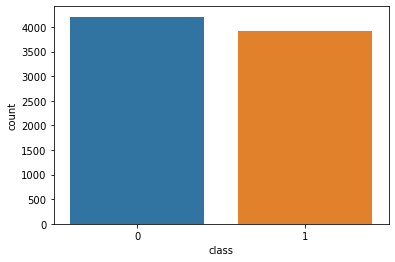

In [13]:
sns.countplot(x='class',data=data)

C:\Users\Pradeepa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

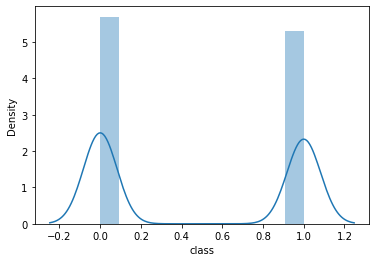

In [14]:
sns.distplot(data['class'])

## Decision Tree

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#Grid Search cv
from sklearn.model_selection import GridSearchCV
params={
    'criterion':['gini','entropy'],
    'max_depth':list(range(1,10)),
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),params,verbose=1,cv=20)

In [17]:
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 20 folds for each of 54 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTreeClassifier(max_depth=8, max_features='auto', random_state=0)


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:   12.7s finished


In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
model=DecisionTreeClassifier(max_depth=8,max_features='auto',criterion='entropy',random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       random_state=0)

#### Decision Tree Visualization

[Text(405.30405405405406, 667.42, 'X[6] <= 3.5\nentropy = 0.999\nsamples = 6093\nvalue = [3147, 2946]'),
 Text(165.89189189189187, 588.9, 'X[7] <= 1.5\nentropy = 0.686\nsamples = 1791\nvalue = [1464, 327]'),
 Text(105.56756756756756, 510.38, 'X[3] <= 8.5\nentropy = 0.067\nsamples = 751\nvalue = [745, 6]'),
 Text(75.4054054054054, 431.85999999999996, 'entropy = 0.0\nsamples = 745\nvalue = [745, 0]'),
 Text(135.72972972972974, 431.85999999999996, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(226.2162162162162, 510.38, 'X[3] <= 8.5\nentropy = 0.892\nsamples = 1040\nvalue = [719, 321]'),
 Text(196.05405405405406, 431.85999999999996, 'X[6] <= 2.5\nentropy = 0.965\nsamples = 822\nvalue = [501, 321]'),
 Text(90.48648648648648, 353.34, 'X[8] <= 5.5\nentropy = 0.531\nsamples = 299\nvalue = [263, 36]'),
 Text(60.32432432432432, 274.82, 'entropy = 0.0\nsamples = 141\nvalue = [141, 0]'),
 Text(120.64864864864865, 274.82, 'X[2] <= 0.5\nentropy = 0.774\nsamples = 158\nvalue = [122, 36]'),
 Te

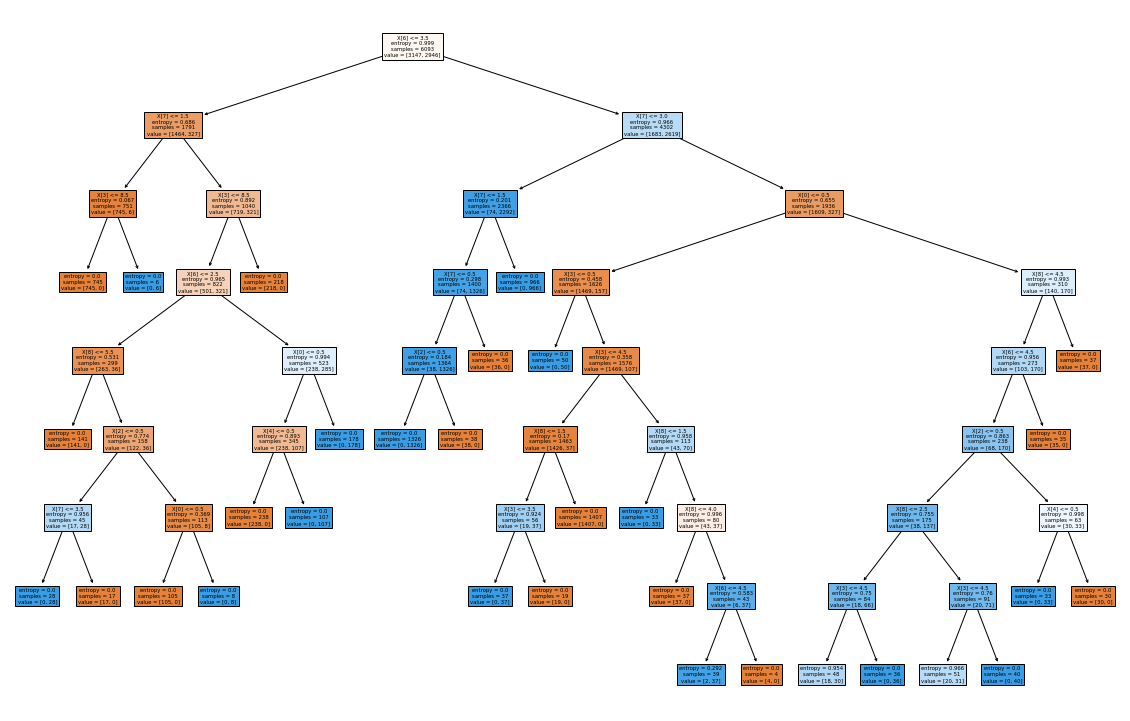

In [20]:
plt.figure(figsize=(20,13))
tree.plot_tree(model,filled=True)

In [21]:
print(tree.export_text(model))

|--- feature_6 <= 3.50
|   |--- feature_7 <= 1.50
|   |   |--- feature_3 <= 8.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  8.50
|   |   |   |--- class: 1
|   |--- feature_7 >  1.50
|   |   |--- feature_3 <= 8.50
|   |   |   |--- feature_6 <= 2.50
|   |   |   |   |--- feature_8 <= 5.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  5.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_7 <= 3.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  3.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  2.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4

In [22]:
y_pred=model.predict(X_test)

In [26]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,1049,12,1061
1,0,970,970
All,1049,982,2031


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[1049    0]
 [  12  970]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1049
           1       1.00      0.99      0.99       982

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [28]:
model.score(X_train,y_train)

0.9934350894469063

In [29]:
model.score(X_test,y_test)

0.9940915805022157

In [30]:
import pickle 
pickle.dump(model,open('decisiontree.pkl','wb'))